In [ ]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

In [ ]:
import zipfile

zip_path = "/content/brain_tumor_dataset.zip"
extract_path = "/content/brain_tumor_dataset"

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

print("Dataset extracted successfully!")



Dataset extracted successfully!


In [ ]:
IMG_SIZE = 150
DATA_DIR = "/content/brain_tumor_dataset/Training"

In [ ]:
def load_data(data_dir):
    X = []
    y = []
    for label in os.listdir(data_dir):
        class_dir = os.path.join(data_dir, label)
        for img_file in os.listdir(class_dir):
            img_path = os.path.join(class_dir, img_file)
            try:
                img = cv2.imread(img_path)
                img = cv2.resize(img, (IMG_SIZE, IMG_SIZE))
                X.append(img)
                y.append(label)
            except:
                continue
    return np.array(X), np.array(y)

X, y = load_data(DATA_DIR)

X = X / 255.0

In [ ]:
import os

base_path = "/content/brain_tumor_dataset"

for root, dirs, files in os.walk(base_path):
    level = root.replace(base_path, '').count(os.sep)
    indent = ' ' * 2 * level
    print(f"{indent}{os.path.basename(root)}/")
    sub_indent = ' ' * 2 * (level + 1)
    for f in files[:5]:
        print(f"{sub_indent}{f}")


brain_tumor_dataset/
  Training/
    glioma_tumor/
      gg (588).jpg
      gg (236).jpg
      gg (525).jpg
      gg (711).jpg
      gg (289).jpg
    no_tumor/
      image(213).jpg
      image(29).jpg
      image(188).jpg
      image(176).jpg
      image(163).jpg
    meningioma_tumor/
      m3 (232).jpg
      m1(51).jpg
      m3 (159).jpg
      m2 (33).jpg
      m1(116).jpg
    pituitary_tumor/
      p (338).jpg
      p (524).jpg
      p (678).jpg
      p (401).jpg
      p (9).jpg
  Testing/
    glioma_tumor/
      image(29).jpg
      image(17).jpg
      image(39).jpg
      image(46).jpg
      image(16).jpg
    no_tumor/
      image(29).jpg
      image(17).jpg
      image(39).jpg
      image(46).jpg
      image(16).jpg
    meningioma_tumor/
      image(29).jpg
      image(17).jpg
      image(39).jpg
      image(46).jpg
      image(16).jpg
    pituitary_tumor/
      image(46).jpg
      image(86).jpg
      image(79).jpg
      image(53).jpg
      image(2).jpg


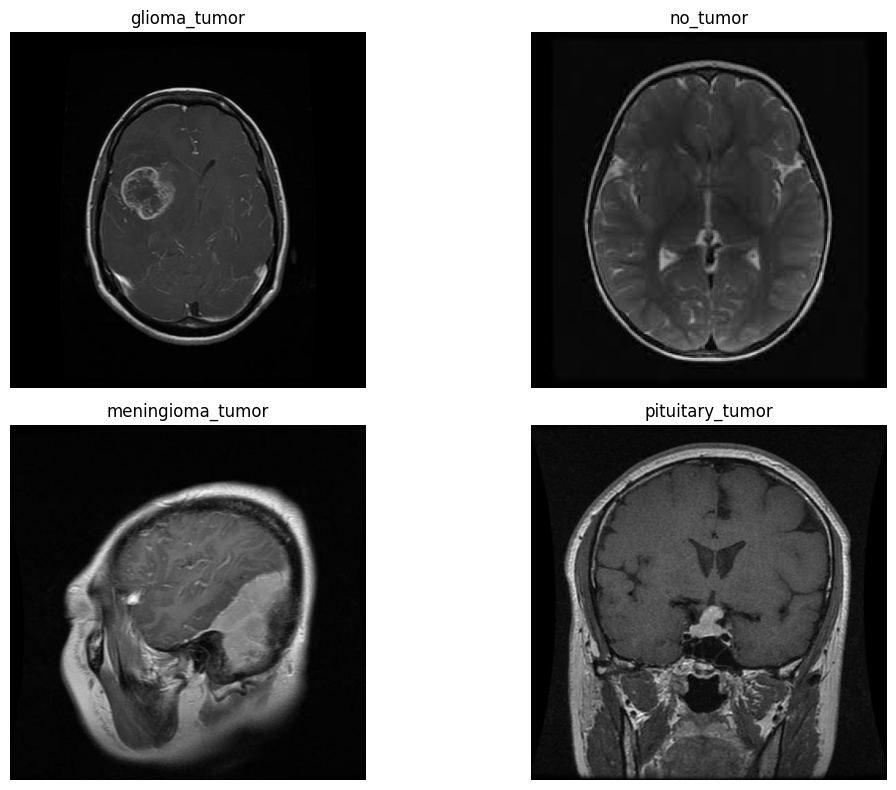

In [ ]:
class_names = ['glioma_tumor', 'no_tumor', 'meningioma_tumor', 'pituitary_tumor']

plt.figure(figsize=(12, 8))

for idx, class_name in enumerate(class_names):
    class_folder = os.path.join(DATA_DIR, class_name)
    img_file = os.listdir(class_folder)[0]
    img_path = os.path.join(class_folder, img_file)

    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    plt.subplot(2, 2, idx + 1)
    plt.imshow(img)
    plt.title(class_name)
    plt.axis("off")

plt.tight_layout()
plt.show()

In [ ]:
X.shape

(2870, 150, 150, 3)

In [ ]:
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)
y = to_categorical(y)

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print(f"Training samples: {len(X_train)}, Validation samples: {len(X_val)}")

Training samples: 2296, Validation samples: 574


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization

In [ ]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    MaxPooling2D(2, 2),
    BatchNormalization(),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    BatchNormalization(),

    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    BatchNormalization(),

    Flatten(),
    Dropout(0.5),
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(4, activation='softmax')
])

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 148, 148, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 74, 74, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 74, 74, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 72, 72, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 36, 36, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 36, 36, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 34, 34, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 17, 17, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 17, 17, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 36992)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 36992)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │       4,735,104 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 4)                   │             516 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,829,764 (18.42 MB)

 Trainable params: 4,829,316 (18.42 MB)

 Non-trainable params: 448 (1.75 KB)

In [ ]:
history = model.fit(
    X_train, y_train,
    epochs=20,
    validation_data=(X_val, y_val),
    batch_size=32
)

Epoch 1/20
72/72 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - accuracy: 0.8997 - loss: 0.2440 - val_accuracy: 0.8693 - val_loss: 0.5368
Epoch 2/20
72/72 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - accuracy: 0.8974 - loss: 0.2394 - val_accuracy: 0.8415 - val_loss: 0.5077
Epoch 3/20
72/72 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - accuracy: 0.9172 - loss: 0.1945 - val_accuracy: 0.5732 - val_loss: 1.6912
Epoch 4/20
72/72 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - accuracy: 0.9227 - loss: 0.2061 - val_accuracy: 0.8780 - val_loss: 0.5845
Epoch 5/20
72/72 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - accuracy: 0.9389 - loss: 0.1725 - val_accuracy: 0.8937 - val_loss: 0.4202
Epoch 6/20
72/72 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - accuracy: 0.9559 - loss: 0.1219 - val_accuracy: 0.8624 - val_loss: 0.5542
Epoch 7/20
72/72 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - accuracy: 0.9650 - loss: 0.0946 - val_accuracy: 0.7474 - val_loss: 2.6263
Epoch 8/20
72/72 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - accuracy: 0.9479 - loss: 0.1379 - val_accuracy: 0.6533 - v

In [ ]:
test_loss, test_accuracy = model.evaluate(X_val, y_val)
print(f"\nTest Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")


18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.8751 - loss: 0.7245

Test Loss: 0.8119
Test Accuracy: 0.8571


In [ ]:
import os

len(os.listdir("/content/brain_tumor_dataset/Training"))


4

Dense(3, activation='softmax')  →  Dense(4, activation='softmax')

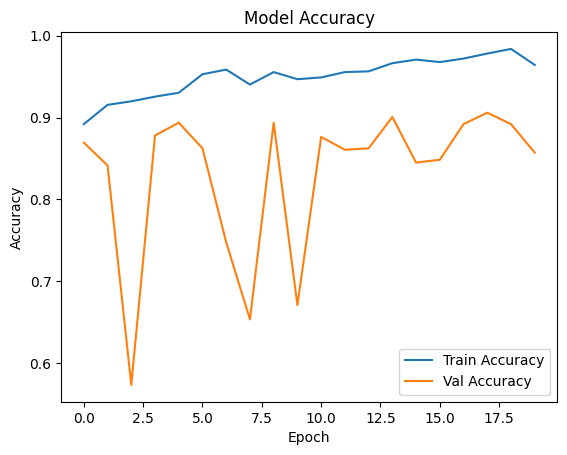

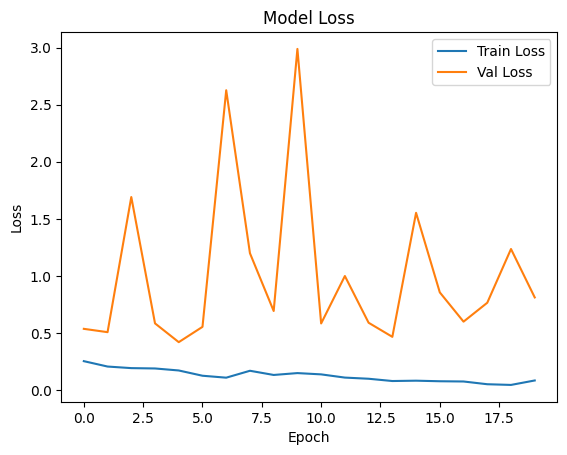

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [ ]:
class_names = ['Glioma', 'Meningioma', 'Pituitary', 'No Tumor']


In [ ]:
import numpy as np

y_pred = model.predict(X_val)
y_pred_labels = np.argmax(y_pred, axis=1)
y_true_labels = np.argmax(y_val, axis=1)


18/18 ━━━━━━━━━━━━━━━━━━━━ 3s 56ms/step


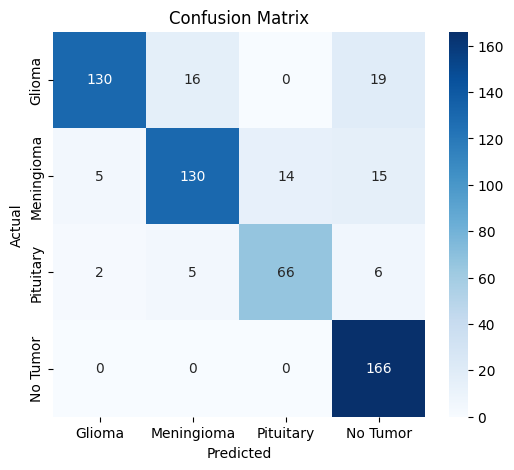

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_true_labels, y_pred_labels)

plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()



In [ ]:
model.save("brain_tumor_model.h5")
print("Model saved successfully!")


Model saved successfully!
